In [40]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
url = 'https://raw.githubusercontent.com/IdioticGrin/Data-Science-Final-Project/main/music_genre.csv'
music = pd.read_csv(url)
music.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

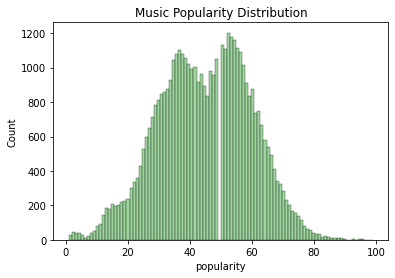

In [44]:
print(music.info())
music = music.dropna(axis = 0)
music = music[music.popularity != 0]
music = music[music.duration_ms != -1]
sns.histplot(music.popularity, bins=100)
plt.title('Music Popularity Distribution')
plt.savefig('music_popularity.png')
plt.show()

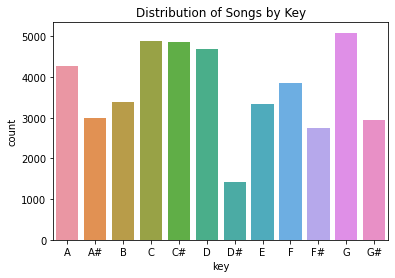

In [5]:
music.key = pd.Categorical(music.key, ordered = True, categories = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#'])
sns.countplot(data=music, x='key')
plt.title('Distribution of Songs by Key')
plt.show()

1410     4830606.0
2133     4497994.0
3759     4276000.0
43868    3195440.0
4593     2764934.0
42075    2294000.0
33508    2019293.0
42337    1935787.0
42726    1872653.0
41158    1778440.0
Name: duration_ms, dtype: float64


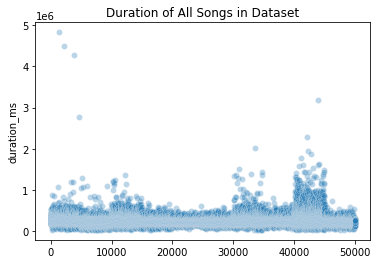

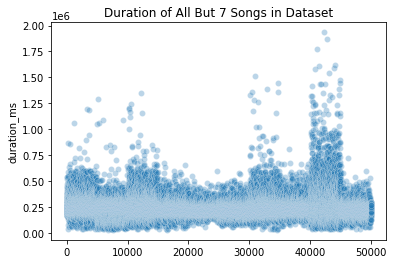

In [6]:
print(music.duration_ms.nlargest(10))
sns.scatterplot(data=music.duration_ms, alpha=.3)
plt.title('Duration of All Songs in Dataset')
plt.show()
music_less = music.drop([1410, 2133, 3759, 43868, 4593, 42075, 33508])
sns.scatterplot(data=music_less.duration_ms, alpha=.3)
plt.title('Duration of All But 7 Songs in Dataset')
plt.show()

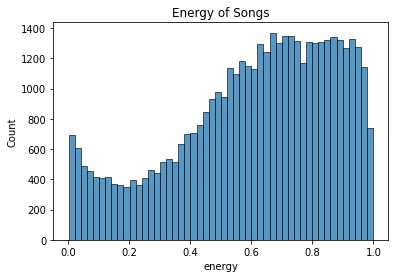

In [7]:
sns.histplot(data = music_less, x='energy', bins=50)
plt.title('Energy of Songs')
plt.show()

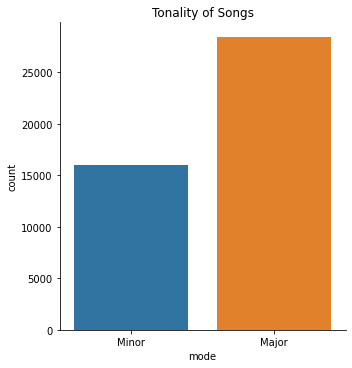

In [8]:
sns.catplot(x='mode', kind = 'count', data=music_less)
plt.title('Tonality of Songs')
plt.show()

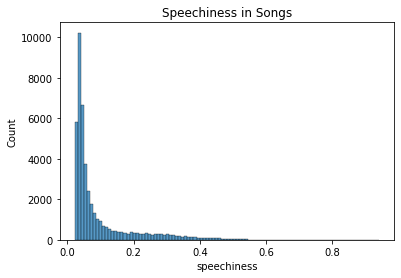

In [9]:
sns.histplot(data = music_less, x='speechiness', bins=100)
plt.title('Speechiness in Songs')
plt.show()

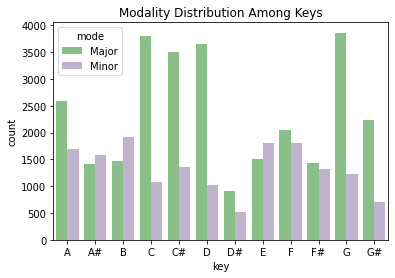

In [45]:
sns.countplot(data = music_less, x='key', hue='mode', hue_order = ['Major', 'Minor'])
sns.set_palette('Accent')
plt.title('Modality Distribution Among Keys')
plt.show()

<function matplotlib.pyplot.show>

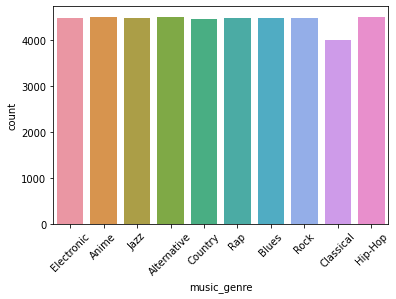

In [13]:
sns.countplot(data = music_less, x='music_genre')
plt.xticks(rotation=45)
plt.show

In [16]:
music_less = music_less.dropna()
print(music_less.info)

<bound method DataFrame.info of        instance_id           artist_name                track_name  \
1          46652.0  Thievery Corporation          The Shining Path   
2          30097.0        Dillon Francis                 Hurricane   
3          62177.0              Dubloadz                     Nitro   
4          24907.0           What So Not          Divide & Conquer   
5          89064.0            Axel Boman                     Hello   
...            ...                   ...                       ...   
49999      28408.0          Night Lovell               Barbie Doll   
50001      43557.0             Roy Woods       Drama (feat. Drake)   
50002      39767.0                Berner  Lovin' Me (feat. Smiggz)   
50003      57944.0             The-Dream         Shawty Is Da Shit   
50004      63470.0     Naughty By Nature            Hip Hop Hooray   

       popularity  acousticness  danceability  duration_ms  energy  \
1            31.0       0.01270         0.622     218293.

In [28]:
selection = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence', 'popularity', 'music_genre']
music_refined = music_less[selection]
music_refined = pd.get_dummies(data = music_refined, columns = ['key', 'mode'])


music_refined = music_refined.round(2)

cols = [i for i in music_refined.columns if i != 'music_genre']
for col in cols:
  music_refined[col] = pd.to_numeric(music_refined[col], errors='coerce')

music_refined = music_refined.dropna()
labels = music_refined.music_genre
music_final = music_refined.drop('music_genre', axis=1)

music_final = music_final.astype(int)

print(labels)
print(music_final.info())

1        Electronic
2        Electronic
3        Electronic
4        Electronic
6        Electronic
            ...    
49999       Hip-Hop
50001       Hip-Hop
50002       Hip-Hop
50003       Hip-Hop
50004       Hip-Hop
Name: music_genre, Length: 39997, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39997 entries, 1 to 50004
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   acousticness      39997 non-null  int64
 1   danceability      39997 non-null  int64
 2   duration_ms       39997 non-null  int64
 3   energy            39997 non-null  int64
 4   instrumentalness  39997 non-null  int64
 5   liveness          39997 non-null  int64
 6   loudness          39997 non-null  int64
 7   speechiness       39997 non-null  int64
 8   tempo             39997 non-null  int64
 9   valence           39997 non-null  int64
 10  popularity        39997 non-null  int64
 11  key_A             39997 non-null 

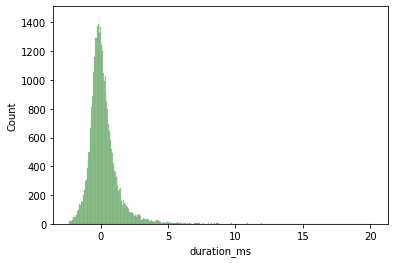

In [29]:
cols = []
for col in music_final.columns:
    cols.append(col)


scaler = RobustScaler()

music_final[cols] = scaler.fit_transform(music_final[cols])


sns.histplot(data=music_final, x='duration_ms')
plt.show()

In [31]:
x_train, x_test, y_train, y_test = train_test_split(music_final, labels, test_size=.2, random_state=42)

In [41]:
tree = RandomForestClassifier(n_estimators = 100)
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)
print(metrics.accuracy_score(y_test, tree_pred))

0.389


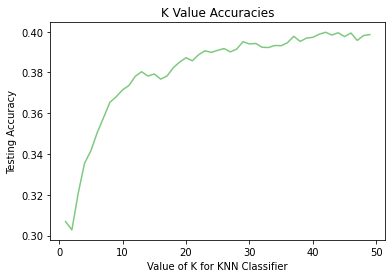

In [46]:
k_scores = []
k_range = range(1,50)

for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  kn_pred=knn.predict(x_test)
  k_scores.append(metrics.accuracy_score(y_test, kn_pred))

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN Classifier')
plt.ylabel('Testing Accuracy')
plt.title('K Value Accuracies')
plt.show()